In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(480, 640, 3)


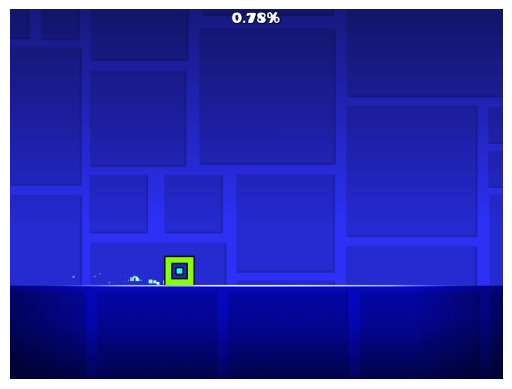

In [ ]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print('cannot access OBS')
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # cv2.imshow('GD Stream', frame)
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        print(frame.shape)
        plt.imshow(frame)
        plt.axis('off')
        # plt.savefig('test.png')
        cap.release()
        break

    # cap.release()
    # cv2.destroyAllWindows()

In [5]:
import win32gui
import win32api
import win32con
import cv2
import time

# Step 1: Find the Geometry Dash window handle
def get_gd_hwnd():
    window_name = "Geometry Dash"
    hwnd = win32gui.FindWindow(None, window_name)
    if hwnd == 0:
        print("Geometry Dash window not found. Make sure the game is running.")
        return None
    print(f"Found Geometry Dash window: {hwnd}")
    return hwnd

# Step 2: Send a spacebar press to the Geometry Dash window
def send_spacebar(hwnd):
    if hwnd:
        # Send spacebar down (WM_KEYDOWN) and up (WM_KEYUP) messages
        win32api.PostMessage(hwnd, win32con.WM_KEYDOWN, win32con.VK_SPACE, 0)
        time.sleep(0.05)  # Short press duration (50ms)
        # Send key up (WM_KEYUP)
        win32api.PostMessage(hwnd, win32con.WM_KEYUP, win32con.VK_SPACE, 0xC0000000)
        print("Spacebar sent to Geometry Dash!")
    else:
        print("Invalid window handle. Cannot send input.")

# Step 3: Stream the video feed
def stream_video():
    cap = cv2.VideoCapture(1)  # Use the correct camera index for OBS Virtual Camera
    if not cap.isOpened():
        print("Video capture failed to open. Check your OBS Virtual Camera setup.")
        return None
    print("Video capture started.")
    return cap

# Step 4: Main loop to send inputs and stream video
def main():
    hwnd = get_gd_hwnd()  # Get the window handle for Geometry Dash
    if not hwnd:
        return  # Exit if the window is not found

    cap = stream_video()  # Start video capture
    if not cap:
        return  # Exit if video capture fails

    last_spacebar_time = time.time()
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Failed to capture video frame.")
                break

            # Display the video feed
            cv2.imshow("Geometry Dash Feed", frame)

            # Press spacebar every 10 seconds
            if time.time() - last_spacebar_time >= 4:
                send_spacebar(hwnd)
                last_spacebar_time = time.time()

            # Exit on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                print("Exiting...")
                break

    finally:
        cap.release()
        cv2.destroyAllWindows()
        print("Cleaned up resources.")


In [6]:
main()

Found Geometry Dash window: 13436232
Video capture started.
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Spacebar sent to Geometry Dash!
Exiting...
Cleaned up resources.
